In [28]:
import numpy as np
from collections import defaultdict
import sys
import itertools
from cliff import CliffWalkingEnv
import matplotlib.pyplot as plt
import gym

In [38]:
class q_learning:
    def __init__(self, alpha, epsilon, gamma, env):
        self.alpha = alpha
        self.eps = epsilon
        self.env = env
        self.gamma = gamma
        self.q = defaultdict(lambda: np.zeros(self.env.action_space.n))
      
    def make_policy(self, Q_, epsilon, num_actions):
        def policy(obs):
            pi = np.ones(num_actions, dtype=float) * epsilon / num_actions
            optimal_action = np.argmax(Q_[obs])
            pi[optimal_action] += 1 - epsilon
            return pi
        return policy
    
    def train(self, epochs):
        ep_reward = np.zeros(epochs)
        ep_length = np.zeros(epochs)
        
        self.policy = self.make_policy(self.q, self.eps, self.env.action_space.n)
        for episode in range(epochs):
            if episode+1 % 10 == 0:
                print('Episode:', episode, '/', epochs)
                sys.stdout.flush()
            
            s = self.env.reset()
            
            for t in itertools.count():
                action_probabilities = self.policy(s)
                action_choice = np.random.choice(np.arange(len(action_probabilities)), p=action_probabilities)

                new_s, reward, done, _ = self.env.step(action_choice)

                ep_reward[episode] += reward
                ep_length[episode] = t
                
                opt_next_action = np.argmax(self.q[new_s])
                delta = reward + self.gamma * self.q[new_s][opt_next_action] - self.q[s][action_choice]
                self.q[s][action_choice] += self.alpha * delta
                
                if done:
                    break
                s = new_s
                
        return self.q, [ep_reward, ep_length]

In [39]:
cliffwalk = CliffWalkingEnv()
ql = q_learning(.5, .1, 1.0, cliffwalk)

In [40]:
Q, tracking = ql.train(500)

Text(0.5,1,'Reward per episode')

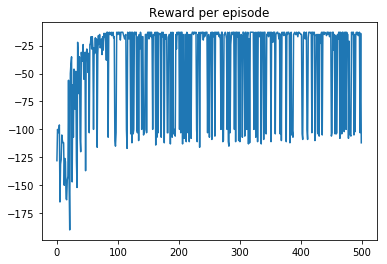

In [41]:
plt.plot(np.arange(500), tracking[0])
plt.title('Reward per episode')

Text(0.5,1,'Episode length')

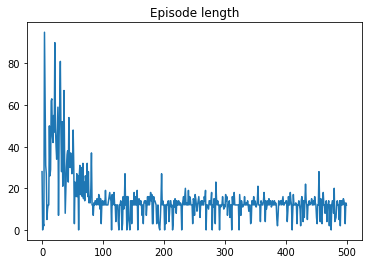

In [42]:
plt.plot(np.arange(500), tracking[1])
plt.title('Episode length')